# Titanic

In [209]:
# data analysis
import numpy as np
import pandas as pd
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [210]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

To visualize the information we check the first rows of the database

In [211]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We want to see how all the variables impacted the variable survive.

In [212]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


First, let's see how many passengers do we have information available

In [213]:
data['PassengerId'].count()

891

We have information of 891 passengers. Now, let's see how many survived:

In [214]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

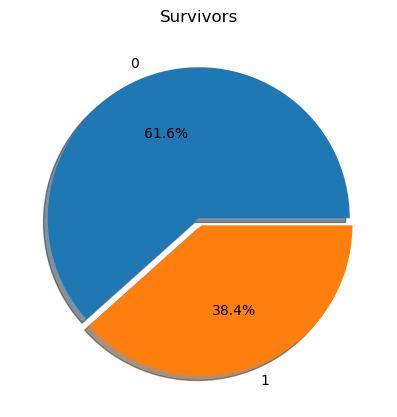

In [215]:
fig_7 = plt.figure(figsize=(8,5), dpi=100)
axes_7 = data['Survived'].value_counts().plot.pie(autopct = '%1.1f%%', explode = [0,0.05], shadow =True)
axes_7.set_title('Survivors')
axes_7.set_ylabel('')
plt.show()

In [216]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


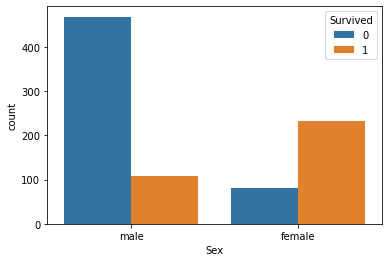

In [217]:
sns.countplot('Sex', hue='Survived', data =data)
plt.show()

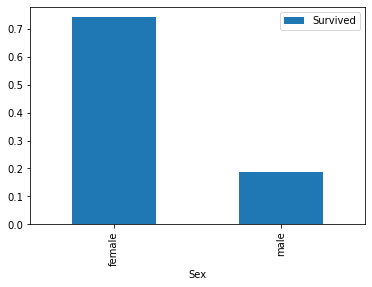

In [218]:
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()
plt.show()

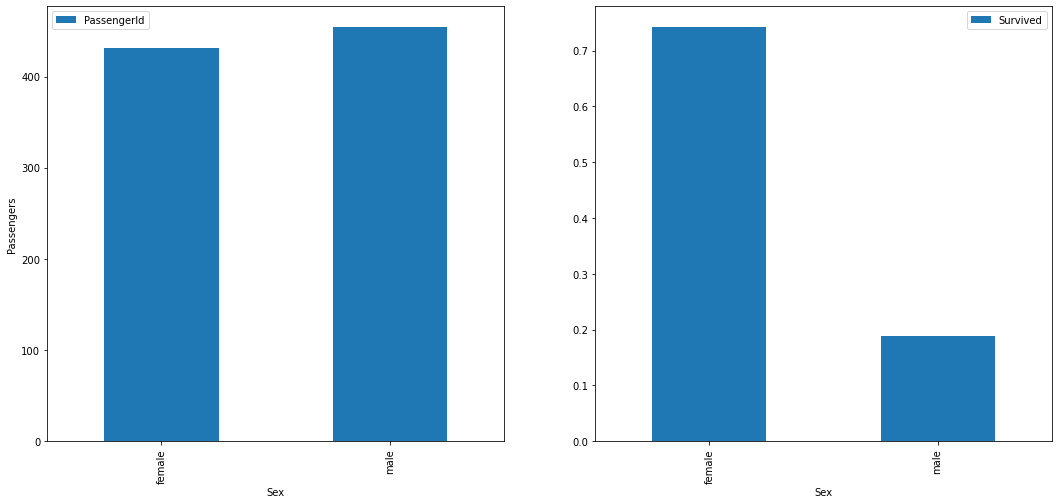

In [219]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex','PassengerId']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_ylabel('Passengers')

data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[1] )

plt.show()

From the graphs we can see that although there were more male passengers, more than 70% of the women survived, in contrast less than 20% of the men survived.

In [220]:
def bar_chart(feature):
    survived = data[ data['Survived']==1][feature].value_counts()
    dead = data[data['Survived']==0][feature].value_counts()
    df =pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5), grid =True)

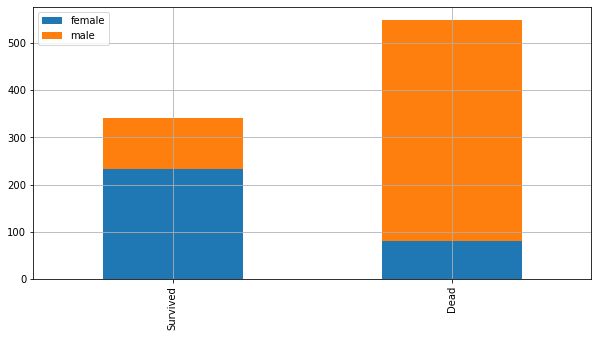

In [221]:
bar_chart('Sex')

In [222]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap = 'autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Note that in the 3rd class there were fewer survivors and the 1st class had a greater number of survivors

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


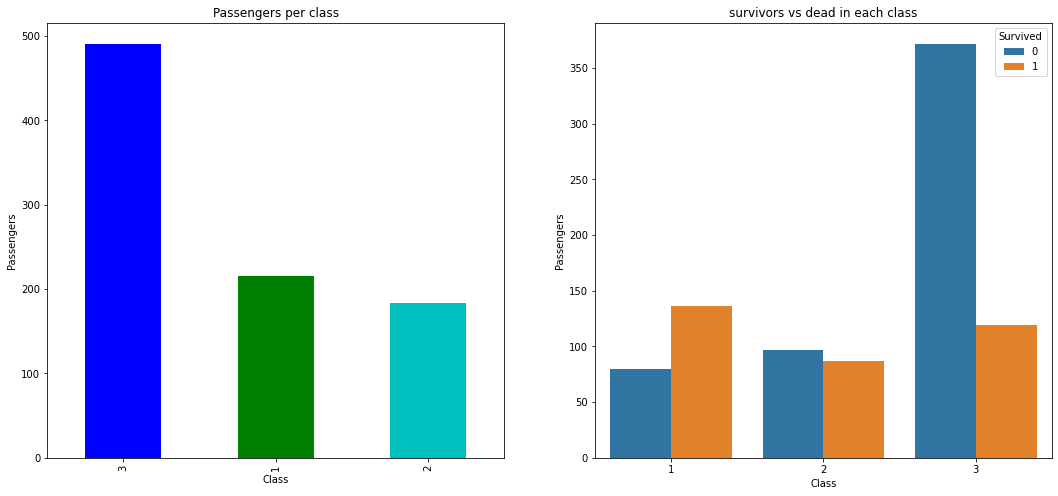

In [223]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0], color=['b', 'g', 'c'])
ax[0].set_title('Passengers per class')
ax[0].set_ylabel('Passengers')
ax[0].set_xlabel('Class')

sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('survivors vs dead in each class')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Passengers')
plt.show()

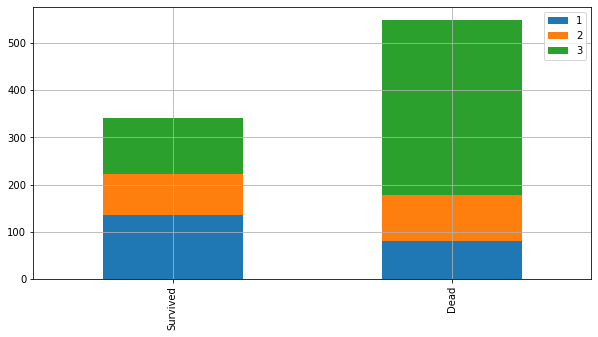

In [224]:
bar_chart('Pclass')

that in the 3rd class there were fewer survivors and the 1st class had a greater number of survivors

In [225]:
pd.crosstab([data['Sex'], data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap = 'autumn_r')

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


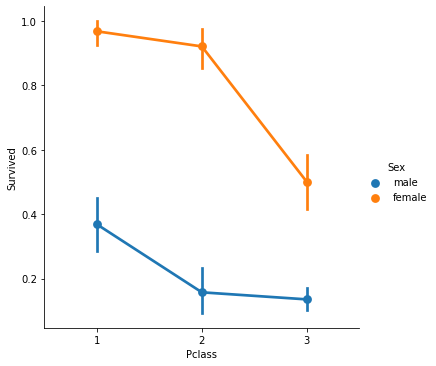

In [226]:
plot=sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

Note that regardless of class, women survive longer than men.

Now, if there someone who rides free like "Jack" in the movie?

In [227]:
print("The most expensive ticket cost:", data['Fare'].max(), "the less expensive ticket cost:", data['Fare'].min())

The most expensive ticket cost: 512.3292 the less expensive ticket cost: 0.0


We can see that at least one person travels for free

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

Text(0.5, 1.0, 'Ticket third class')

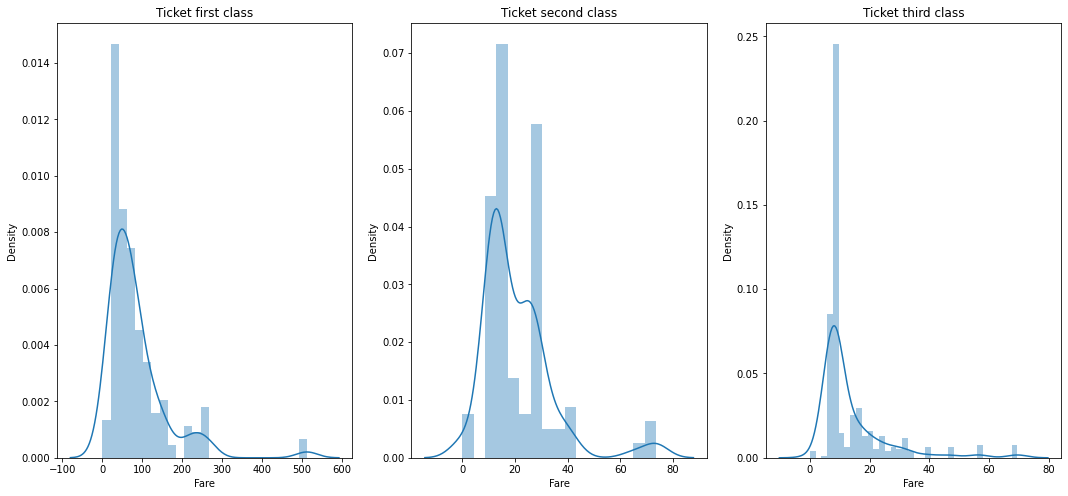

In [228]:
f, ax = plt.subplots(1,3, figsize=(18,8))

sns.distplot( data[data['Pclass']==1]['Fare'], ax=ax[0])
ax[0].set_title('Ticket first class')

sns.distplot( data[data['Pclass']==2]['Fare'], ax=ax[1])
ax[1].set_title('Ticket second class')

sns.distplot( data[data['Pclass']==3]['Fare'], ax=ax[2])
ax[2].set_title('Ticket third class') 

In [229]:
print("The biggest family members were:", data['SibSp'].max())

The biggest family members were: 8


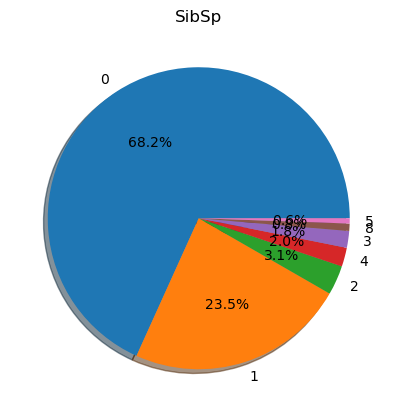

In [230]:
fig_7 = plt.figure(figsize=(8,5), dpi=100)
axes_7 = data['SibSp'].value_counts().plot.pie(autopct = '%1.1f%%', shadow =True)
axes_7.set_title('SibSp')
axes_7.set_ylabel('')
plt.show()

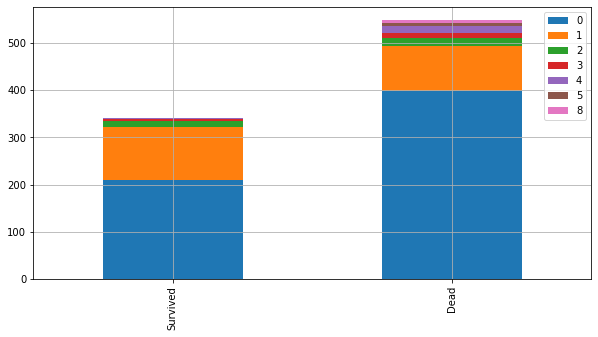

In [231]:
bar_chart('SibSp')

We can see that it was a ship of singles, since the majority went alone

In [232]:
pd.crosstab([data['Sex'], data['Survived']], data['SibSp'], margins=True).style.background_gradient(cmap = 'autumn_r')

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


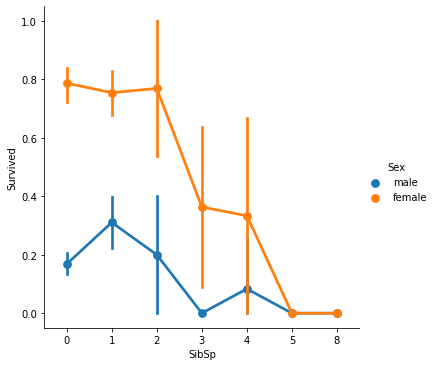

In [233]:
plot=sns.factorplot('SibSp', 'Survived', hue='Sex', data=data)
plt.show()

Note that it was more likely to survive if you went with maximum 2 friends

## Data Cleaning
### Data cleaning by age

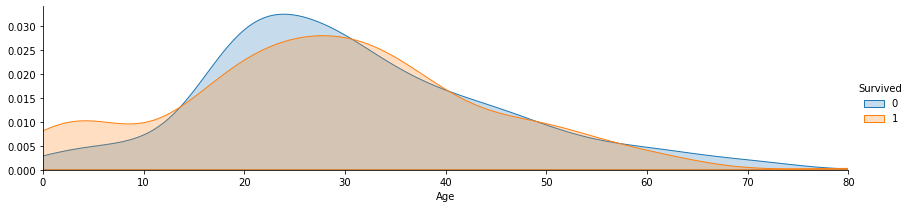

In [234]:
facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
 
plt.show() 

In [235]:
data['Age_range']=0
data.loc[data['Age']<= 17, 'Age_range']=0
data.loc[(data['Age']>17) & (data['Age']<=35), 'Age_range']=1
data.loc[(data['Age']>35) & (data['Age']<=50), 'Age_range']=2
data.loc[(data['Age']>50) & (data['Age']<=65), 'Age_range']=3
data.loc[data['Age']>65, 'Age_range']=4

In [236]:
data.head() #We see the first 5 to check that there is a new column called 'Age_range'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [237]:
data['Age_range'].value_counts().to_frame().style.background_gradient(cmap='autumn_r')

,Age_range
1,384
0,290
2,153
3,56
4,8


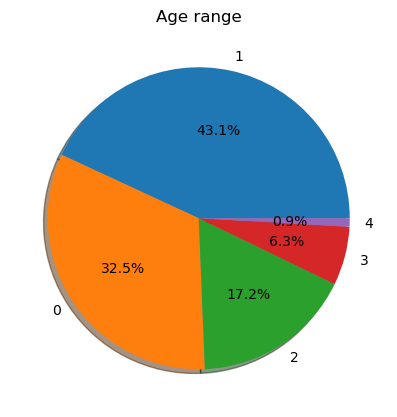

In [238]:
fig_agerange = plt.figure(figsize=(8,5), dpi=100)
axes_agerange = data['Age_range'].value_counts().plot.pie(autopct = '%1.1f%%', shadow =True)
axes_agerange.set_title('Age range')
axes_agerange.set_ylabel('')
plt.show()

We can see that it was a youth boat since most were under 35 years old

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


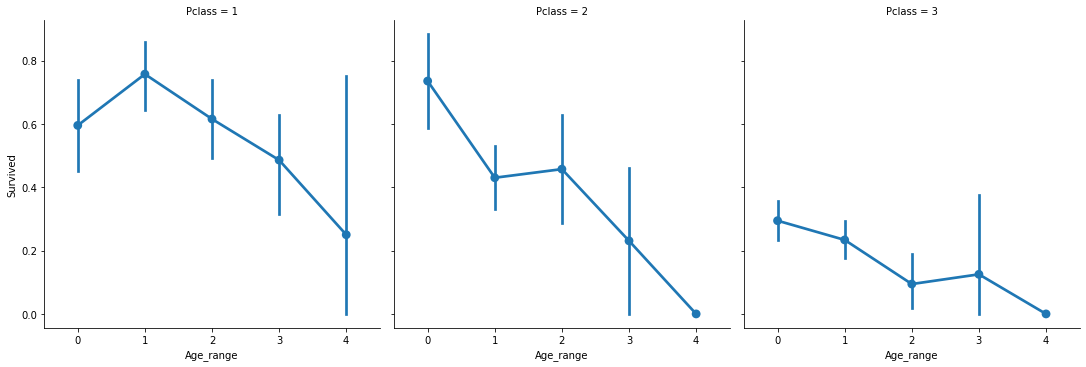

In [239]:
sns.factorplot('Age_range', 'Survived', data=data, col='Pclass')

Let us note that in first class the majority of those who survived were between 18 and 35 years old, while in second and third class priority was given to rescuing those under 18 years of age.

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


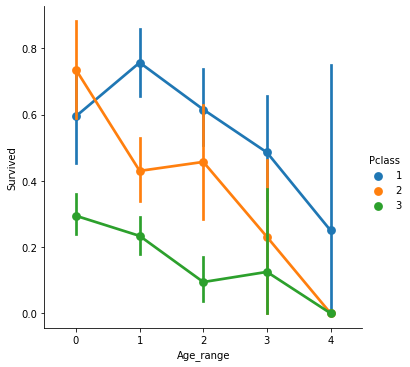

In [240]:
plot=sns.factorplot('Age_range', 'Survived', hue='Pclass', data=data)
plt.show()

### Data cleaning by fare

We divide the fare into 4 ranges

In [241]:
data['fare_range'] = pd.qcut(data['Fare'],4)

In [242]:
data.groupby(['fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap='autumn_r')

,Survived
fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [243]:
data['fare_category']=0
data.loc[data['Fare']<= 7.91, 'fare_category']=0
data.loc[(data['Fare']>7.91) & (data['Fare']<=14.454), 'fare_category']=1
data.loc[(data['Fare']>14.454) & (data['Fare']<=31.0), 'fare_category']=2
data.loc[(data['Fare']>31.0) & (data['Fare']<=512.329), 'fare_category']=3

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


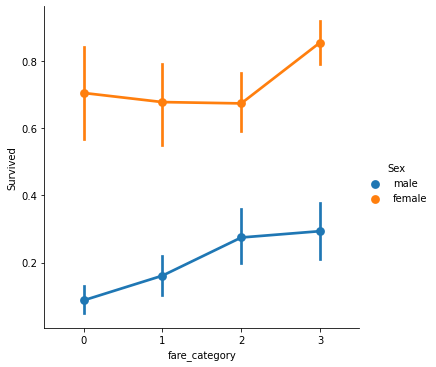

In [244]:
sns.factorplot('fare_category', 'Survived', data=data, hue='Sex')

The more you paid for the ticket, the more likely you were to survive.
## Convert string values to numeric values

In [245]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S','C', 'Q'], [0,1,2], inplace=True)

In [246]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_range,fare_range,fare_category
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,2,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,1,"(7.91, 14.454]",1


Now, we will eliminate the unnecessary columns since they do not provide us with relevant information

In [247]:
train_data= data.copy()

In [248]:
train_data.drop(['PassengerId', 'Name', 'Age', 'Fare','Ticket', 'Cabin', 'fare_range'], axis=1, inplace=True)
target = data['Survived']

In [251]:
train_data.head(4)

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_range,fare_category
0,0,3,0,1,0,0.0,1,0
1,1,1,1,1,0,1.0,2,3
2,1,3,1,0,0,0.0,1,1
3,1,1,1,1,0,0.0,1,3


In [252]:
train_data.isnull().sum()

Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Embarked         2
Age_range        0
fare_category    0
dtype: int64

In [253]:
train_data[ data['Embarked'].isnull()]

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_range,fare_category
61,1,1,1,0,0,NaN,2,3
829,1,1,1,0,0,NaN,3,3


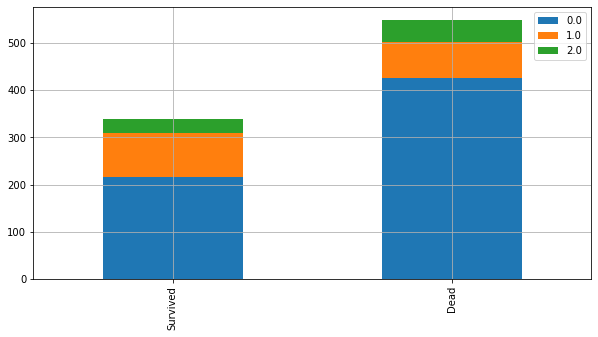

In [254]:
bar_chart('Embarked')

C:\Users\sammy\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of passengers who entered through each gate')

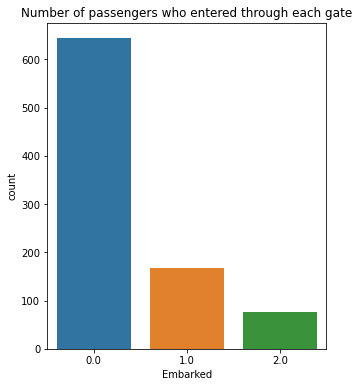

In [255]:
f,ax = plt.subplots(1,1, figsize=(5,6))

sns.countplot('Embarked', data=train_data, ax=ax)
ax.set_title('Number of passengers who entered through each gate')

Since most passengers entered through gate 0 we will assign them gate 0

In [256]:
train_data['Embarked'].fillna(0, inplace=True)

In [257]:
train_data.isnull().sum()

Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Embarked         0
Age_range        0
fare_category    0
dtype: int64

In [ ]:
#data.to_csv("clean_titanic.csv")
#data.to_excel("clean_titanic.xlsx")

## Modeling

In [274]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [275]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Pclass         891 non-null    int64  
 2   Sex            891 non-null    int64  
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   Embarked       891 non-null    float64
 6   Age_range      891 non-null    int64  
 7   fare_category  891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


### Cross Validation

In [276]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### KNN

In [277]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.95555556 0.94382022 0.94382022 0.98876404 0.94382022 0.95505618
 0.96629213 0.94382022 0.96629213 0.97752809]


In [278]:
# kNN Score
round(np.mean(score)*100, 2)

95.85

## Decision Tree

In [279]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [280]:
# decision tree Score
round(np.mean(score)*100, 2)

100.0

## Ramdom Forest

In [281]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [282]:
# Random Forest Score
round(np.mean(score)*100, 2)

100.0

## Naive Bayes

In [283]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [284]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

100.0

## SVM

In [285]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[1.         1.         0.97752809 1.         1.         1.
 1.         0.98876404 1.         1.        ]


In [286]:
round(np.mean(score)*100,2)

99.66

# Testing